# Stock Data Scrapper #
This Python script scrapes the stock data from https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&index=9

Importing all the dependencies

In [1]:
from stock import Stock
import urllib.request as request
from bs4 import BeautifulSoup
import pandas as pd
from stockstats import StockDataFrame as Sdf
import time
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math
from datetime import datetime
import os

# Supress all the warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating an object of Stock
stock_obj = Stock()

# Get HTML and response code to see if it worked
html_content, response_code = stock_obj.get_HTML(get_response = True)
print('Response Code : ', response_code,end = '\n\n')
print(html_content[:500])

Response Code :  200

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost</title>\r\n<meta name="description" content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Mone'


In [3]:
# Get Stock Data

In [4]:
stock_data = stock_obj.get_stock_data()
stock_data

,Company Name,Industry,LastPrice,Change,%Chg,Mkt Cap(Rs cr)
1,Adani Ports,Transport Infrastructure,245.10,13.35,5.76,49798.24
2,Asian Paints,Paints,1537.05,12.20,0.80,147433.50
3,Axis Bank,Bank - Private,324.60,21.45,7.08,91583.99
4,Bajaj Auto,Automobile - 2 & 3 Wheelers,1926.85,-10.30,-0.53,55756.68
5,Bajaj Finance,Finance - NBFC,2501.30,27.10,1.10,150500.49
6,Bajaj Finserv,Finance - Investment,4666.55,168.80,3.75,74262.21
7,Bharti Airtel,Telecommunication - Service Provider,428.35,24.30,6.01,233688.80
8,Bharti Infratel,Telecommunication - Equipment,143.40,1.45,1.02,26523.38
9,BPCL,Refineries,264.25,1.40,0.53,57322.50
10,Britannia,Consumer Food,2468.05,103.35,4.37,59348.78


Function to get alert when the %Chg value for a company gets chaged by chage_thres or more

In [5]:
def get_alert(sleep_time = 30, total_duration = 600, change_thres = 2):
    
    # Initial %Chg values
    initial_Chg = np.array(stock_obj.get_stock_data(['%Chg']))
    
    changes_found = False
    
    # Continuesly Checking if the %Chg value has changed
    for _ in range(total_duration//sleep_time):
        
        # Sleeping for sleep_time
        time.sleep(sleep_time)
        
        # Current time
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        
        # Current %Chg
        current_Chg = np.array(stock_obj.get_stock_data(['%Chg']))
        
        # Difference in %Chg values
        Chg_diffs = current_Chg - initial_Chg
        
        
        # Alert if the %Chg has changed with change_thres or more
        for i, dif in enumerate(Chg_diffs):
 
            if(abs(dif[0]) >= change_thres):
                print('Alert ('+current_time+'): %Chg for '+ stock_data.iloc[i+1][0] + ' has changed by '+ str(np.round(dif[0], 2)) + '%.') 
                initial_Chg[i] = dif[0]
                changes_found = True
                
            
    # If there is no changes by change_thres or more
    if(not changes_found):
        print('No changes found by '+str(change_thres) + '% or more.')

Call the get_alert function

In [6]:
get_alert()

Alert (12:38:36): %Chg for HDFC Bank has changed by 2.14%.
Alert (12:39:08): %Chg for HDFC Bank has changed by 4.04%.
Alert (12:39:40): %Chg for HDFC Bank has changed by 2.14%.
Alert (12:40:11): %Chg for HDFC Bank has changed by 4.31%.
Alert (12:40:11): %Chg for IndusInd Bank has changed by 2.9%.
Alert (12:40:44): %Chg for IndusInd Bank has changed by -2.41%.
Alert (12:41:16): %Chg for HDFC Bank has changed by 2.2%.
Alert (12:41:16): %Chg for IndusInd Bank has changed by 3.91%.
Alert (12:41:48): %Chg for HDFC Bank has changed by 4.31%.
Alert (12:41:48): %Chg for IndusInd Bank has changed by -2.41%.
Alert (12:42:19): %Chg for HDFC Bank has changed by 2.6%.
Alert (12:42:19): %Chg for IndusInd Bank has changed by 3.59%.
Alert (12:42:52): %Chg for HDFC Bank has changed by 4.31%.
Alert (12:42:52): %Chg for IndusInd Bank has changed by -2.41%.
Alert (12:43:23): %Chg for HDFC Bank has changed by 2.23%.
Alert (12:43:23): %Chg for IndusInd Bank has changed by 3.24%.
Alert (12:43:56): %Chg for H

Function for getting MACD indicators

In [7]:
def get_macd_indicators(n_companies = 4):
    
    # Reading the CSV files
    csv_files = os.listdir('stock_data')
    
    # Names of the companies
    C_names = np.array(stock_obj.get_stock_data(['Company Name'])[:n_companies])
    
    MACDs, MACDSs, MACDHs = list(),list(),list()
    
    all_close_data = stock_obj.get_close_data(csv_files)
    
    # Getting all the MACD indicators using stockstats
    for data in all_close_data[:n_companies]:
        
        close_data = pd.DataFrame(data, columns = ['close'])
        close_data.index = range(1, len(close_data)+1)
        close_data =  Sdf.retype(close_data)
        
        
        MACDs.append(close_data['macd'])   # MACD
        MACDSs.append(close_data['macds']) # MACD signal line
        MACDHs.append(close_data['macdh']) # MACD histogram
        
        
    return(C_names, MACDs, MACDSs, MACDHs)

Get MACD indicators

In [8]:
C_names, MACDs, MACDSs, MACDHs = get_macd_indicators(n_companies=4)

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


Plot MACD indicators

In [9]:
def plot_macd_indicators(C_names, MACDs, MACDSs, MACDHs):
    
    # Setting number of rows and columns for the figure
    n_cols = 2
    num_com = len(C_names)
    n_rows = math.ceil(num_com/n_cols)
    
    # Getting the figure object from matplotlib
    fig = plt.figure(figsize=(n_rows*10,n_rows*5))
    ax = fig.subplots(nrows = n_rows, ncols = n_cols)
    
    # Plotting all the indicators in grid
    count = 0
    for row in ax:
        for col in row:
            col.plot(MACDs[count],label='MACD')
            col.plot(MACDSs[count], '-.',label='MACD Signal')
            col.plot(MACDHs[count], '-',label='MACD Histogram')    
            col.legend()
            col.set_title(*C_names[count])
            col.set_xlabel('Time')
            col.set_ylabel('MACD')
            count +=1
            if(count == num_com):
                fig.show()
                return

Call the function and plot the indicators

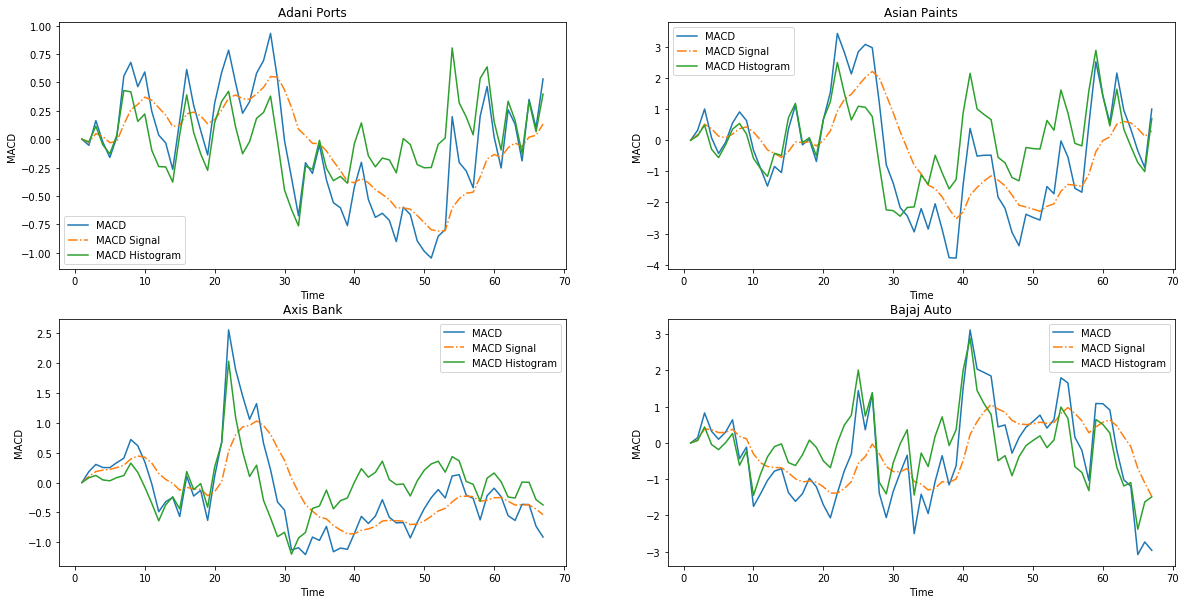

In [10]:
plot_macd_indicators(C_names, MACDs, MACDSs, MACDHs)